In [19]:
# 신경망 모델 훈련

In [20]:

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()


손실 곡선

In [21]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [22]:

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [23]:
model = model_fn()

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)



In [25]:
model2 = model_fn()
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(val_scaled, val_target, epochs=5, verbose=0)

In [27]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [28]:
print(history2.history.keys())

dict_keys(['loss', 'accuracy'])


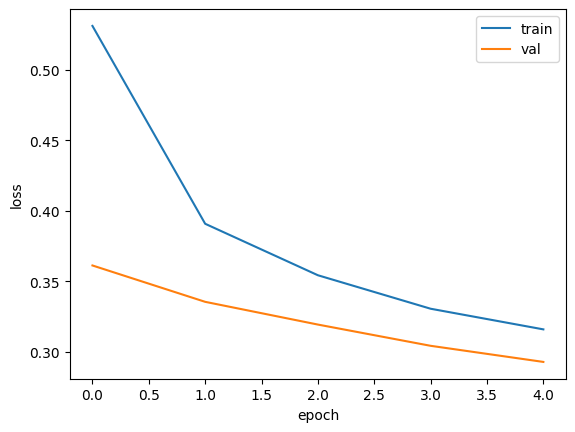

In [29]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label="train")
plt.plot(history2.history['loss'], label="val")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

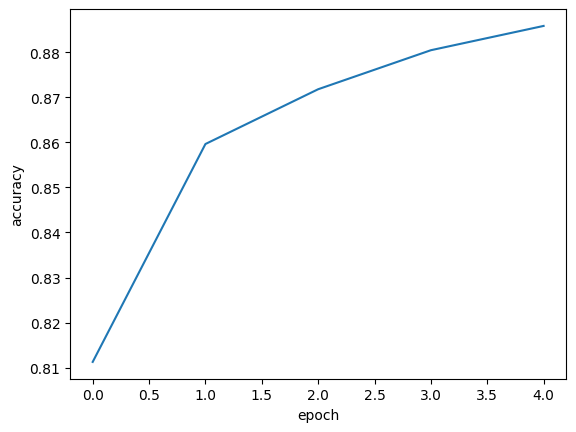

In [30]:

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [31]:

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

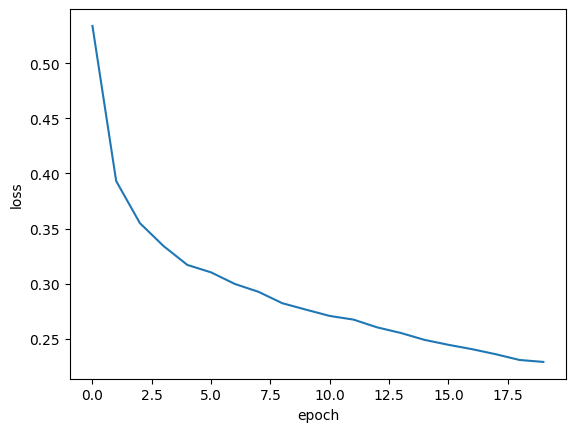

In [33]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

검증 손실

In [34]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [37]:

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


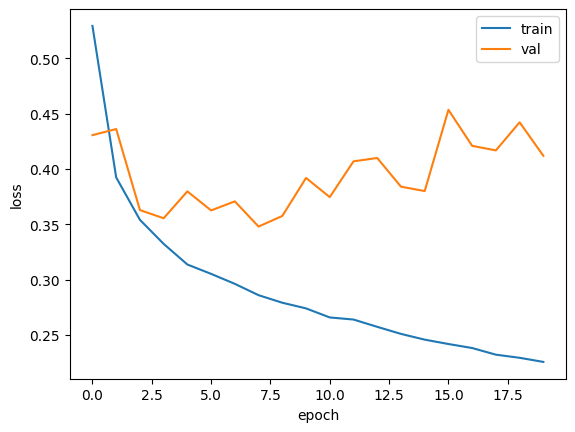

In [38]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [39]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

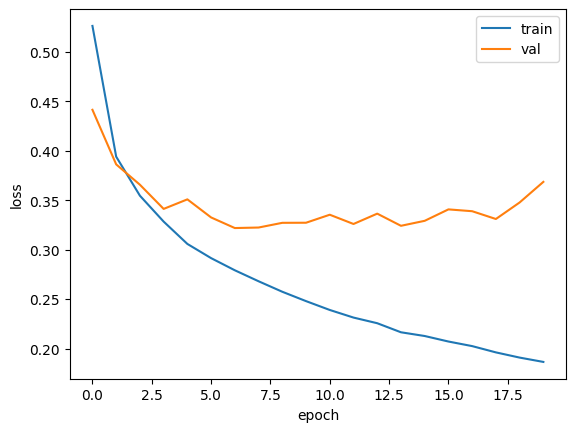

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 드롭아웃

In [41]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

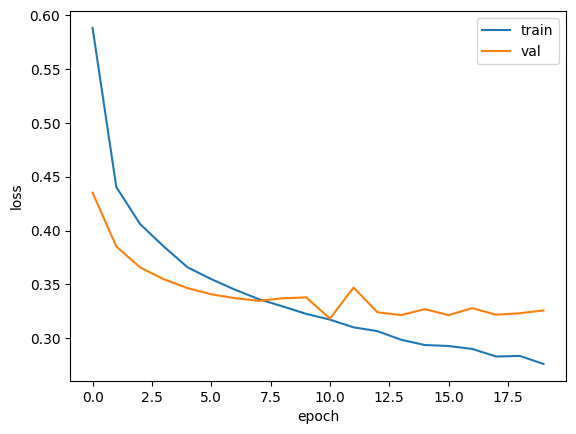

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 저장과 복원

In [65]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [66]:
model.save('model-whole.keras')

In [67]:
model.save_weights('model.weights.h5')

In [68]:
!ls -al model*

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [69]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model.weights.h5')

In [70]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8809166666666667


In [71]:
model = keras.models.load_model('model-whole.keras')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8809


[0.3374384641647339, 0.8809166550636292]

# 콜백

In [75]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

modelpath = "./model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpoint_cb = keras.callbacks.ModelCheckpoint( filepath=modelpath , verbose=1)
# checkpoint_cb = keras.callbacks.ModelCheckpoint(   'best-model.keras',
#                                                     save_best_only=True )
model.fit(train_scaled, train_target, 
          epochs=20, 
          verbose=1,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1483/1500 [============================>.] - ETA: 0s - loss: 0.5853 - accuracy: 0.7962
Epoch 1: saving model to ./model/all\01-0.8487.keras
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5843 - accuracy: 0.7965 - val_loss: 0.4219 - val_accuracy: 0.8487
Epoch 2/20
1497/1500 [============================>.] - ETA: 0s - loss: 0.4331 - accuracy: 0.8431
Epoch 2: saving model to ./model/all\02-0.8652.keras
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4336 - accuracy: 0.8430 - val_loss: 0.3759 - val_accuracy: 0.8652
Epoch 3/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.4006 - accuracy: 0.8545
Epoch 3: saving model to ./model/all\03-0.8625.keras
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4006 - accuracy: 0.8545 - val_loss: 0.3698 - val_accuracy: 0.8625
Epoch 4/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.3803 - accuracy: 0.8623
Epoch 4: saving model to ./model/all\04-0.8741.ker

In [64]:
model = keras.models.load_model('best-model.keras')

model.evaluate(val_scaled, val_target)

2.13.0


In [76]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

modelpath = "./model/all_earlystop/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=modelpath, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1: saving model to ./model/all_earlystop\01-0.8460.keras

Epoch 2: saving model to ./model/all_earlystop\02-0.8614.keras

Epoch 3: saving model to ./model/all_earlystop\03-0.8634.keras

Epoch 4: saving model to ./model/all_earlystop\04-0.8678.keras

Epoch 5: saving model to ./model/all_earlystop\05-0.8717.keras

Epoch 6: saving model to ./model/all_earlystop\06-0.8777.keras

Epoch 7: saving model to ./model/all_earlystop\07-0.8763.keras

Epoch 8: saving model to ./model/all_earlystop\08-0.8812.keras

Epoch 9: saving model to ./model/all_earlystop\09-0.8826.keras

Epoch 10: saving model to ./model/all_earlystop\10-0.8785.keras

Epoch 11: saving model to ./model/all_earlystop\11-0.8831.keras

Epoch 12: saving model to ./model/all_earlystop\12-0.8812.keras

Epoch 13: saving model to ./model/all_earlystop\13-0.8838.keras

Epoch 14: saving model to ./model/all_earlystop\14-0.8769.keras

Epoch 15: saving model to ./model/all_earlystop\15-0.8867.keras

Epoch 16: saving model to ./model

In [77]:
print(early_stopping_cb.stopped_epoch)

17


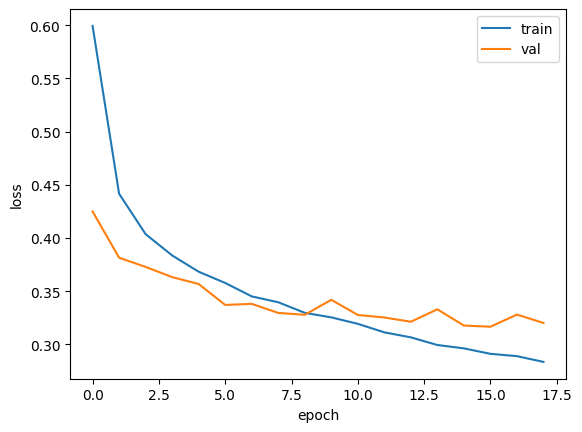

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()